In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_excel('customer_transcation.xlsx')

In [24]:
df.head()

,Txn ID,First Name,Last Name,Email,Job Title,Product,Purchase Mode,Date,Purchase Amount
0,TX00-01,Yedukondalu,Panditula,ypanditula@hugedomains.com,Office Assistant,Drinking Coco,Website,2023-12-01,NaN
1,TX00-02,Ponnan,Delhi,pdelhi@yale.edu,Analyst,Honey Caramel Truffle,App,2023-12-01,NaN
2,TX00-03,Prerana,Nishita,pnishita5@google.de,Sales,Hazelnut Praline Bars,Website,2023-12-01,930.0
3,TX00-04,Subbarao,Malladi,smalladi@gmpg.org,Engineer,Spicy Special Slims,In store,2023-12-02,NaN
4,TX00-05,Sarayu,Ragunathan,sragunathan2@nhs.uk,Engineer,Almond Raspberry Cluster,In store,2023-12-02,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Txn ID           443 non-null    object        
 1   First Name       443 non-null    object        
 2   Last Name        443 non-null    object        
 3   Email            443 non-null    object        
 4   Job Title        443 non-null    object        
 5   Product          443 non-null    object        
 6   Purchase Mode    443 non-null    object        
 7   Date             443 non-null    datetime64[ns]
 8   Purchase Amount  326 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 31.3+ KB


**data cleaning**

In [26]:
df.isnull().sum()

Txn ID               0
First Name           0
Last Name            0
Email                0
Job Title            0
Product              0
Purchase Mode        0
Date                 0
Purchase Amount    117
dtype: int64

**filling null values**

In [27]:
for i in df.columns:
    if df[i].dtype == 'float':
        df[i] = df[i].fillna("0")
    else:
        df[i] = df[i].fillna(df[i])
        

In [28]:
df.isnull().sum()

Txn ID             0
First Name         0
Last Name          0
Email              0
Job Title          0
Product            0
Purchase Mode      0
Date               0
Purchase Amount    0
dtype: int64

In [29]:
df

,Txn ID,First Name,Last Name,Email,Job Title,Product,Purchase Mode,Date,Purchase Amount
0,TX00-01,Yedukondalu,Panditula,ypanditula@hugedomains.com,Office Assistant,Drinking Coco,Website,2023-12-01,0
1,TX00-02,Ponnan,Delhi,pdelhi@yale.edu,Analyst,Honey Caramel Truffle,App,2023-12-01,0
2,TX00-03,Prerana,Nishita,pnishita5@google.de,Sales,Hazelnut Praline Bars,Website,2023-12-01,930.0
3,TX00-04,Subbarao,Malladi,smalladi@gmpg.org,Engineer,Spicy Special Slims,In store,2023-12-02,0
4,TX00-05,Sarayu,Ragunathan,sragunathan2@nhs.uk,Engineer,Almond Raspberry Cluster,In store,2023-12-02,0
...,...,...,...,...,...,...,...,...,...
438,TX04-39,Pragya,Nilufar,pnilufar4@comsenz.com,Professor,50% Dark Bites,Website,2024-02-28,470.0
439,TX04-40,Amal,Nimesh,animesh@spotify.com,Professor,Milk Bars,Website,2024-02-28,1790.0
440,TX04-41,Shevantilal,Muppala,smuppala@stumbleupon.com,Engineer,Milk Bars,In store,2024-02-28,80.0
441,TX04-42,Ilesh,Dasgupta,idasgupta1@yolasite.com,HR,Organic Choco Syrup,Website,2024-02-28,355.0


In [30]:
df.duplicated().sum()

0

In [31]:
for i in df:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('********************************************')

TX00-01    1
TX02-92    1
TX03-03    1
TX03-02    1
TX03-01    1
          ..
TX01-45    1
TX01-44    1
TX01-43    1
TX01-42    1
TX04-43    1
Name: Txn ID, Length: 443, dtype: int64
********************************************
Sahas          11
Suman           9
Sameer          9
Shevantilal     9
Mahindra        9
               ..
Fullara         2
Godavari        2
Oorjit          1
Suchira         1
Vanmala         1
Name: First Name, Length: 91, dtype: int64
********************************************
Sanabhi Shrikant    11
Katte                9
Shashank Sapra       9
Muppala              9
Sreedharan           9
                    ..
Sushanti Mokate      2
Veena                2
Nandanavanam         1
Bhanupriya Tapti     1
Shriharsha           1
Name: Last Name, Length: 91, dtype: int64
********************************************
ssanabhi.shrikant3@ted.com         11
skatte@flavors.me                   9
sshashank.sapra@oaic.gov.au         9
smuppala@stumbleupon.com        

In [ ]:
#df['status'] = df['Purchase Amount'].replace("Purchase_Amount",'Purchased')

In [37]:
df['status'] = np.where(df['Purchase Amount'] == '0', 'Not_Purchased', 'Purchased')

In [38]:
df['status']

0      Not_Purchased
1      Not_Purchased
2          Purchased
3      Not_Purchased
4      Not_Purchased
           ...      
438        Purchased
439        Purchased
440        Purchased
441        Purchased
442        Purchased
Name: status, Length: 443, dtype: object

In [39]:
df.head()

,Txn ID,First Name,Last Name,Email,Job Title,Product,Purchase Mode,Date,Purchase Amount,status
0,TX00-01,Yedukondalu,Panditula,ypanditula@hugedomains.com,Office Assistant,Drinking Coco,Website,2023-12-01,0,Not_Purchased
1,TX00-02,Ponnan,Delhi,pdelhi@yale.edu,Analyst,Honey Caramel Truffle,App,2023-12-01,0,Not_Purchased
2,TX00-03,Prerana,Nishita,pnishita5@google.de,Sales,Hazelnut Praline Bars,Website,2023-12-01,930.0,Purchased
3,TX00-04,Subbarao,Malladi,smalladi@gmpg.org,Engineer,Spicy Special Slims,In store,2023-12-02,0,Not_Purchased
4,TX00-05,Sarayu,Ragunathan,sragunathan2@nhs.uk,Engineer,Almond Raspberry Cluster,In store,2023-12-02,0,Not_Purchased


**EDA**

In [40]:
pd.crosstab(df.Job Title,df.status)

SyntaxError: invalid syntax (3058164262.py, line 1)

In [41]:
df = df.rename(columns={'Txn ID': 'Txn_ID',
           'First Name':'First_name',
           'Last Name':'Last_name',
           'Job Title' : 'job_title',
           'Purchase Mode' : 'Purchase_mode',
           'Purchase Amount' : 'Purchase_Amount'
           })
df.columns

Index(['Txn_ID', 'First_name', 'Last_name', 'Email', 'job_title', 'Product',
       'Purchase_mode', 'Date', 'Purchase_Amount', 'status'],
      dtype='object')

In [42]:
pd.crosstab(df.job_title,df.status)

status,Not_Purchased,Purchased
job_title,,
Accountant,4,19
Administrator,1,2
Analyst,10,37
Doctor,7,20
Engineer,23,46
Finance Professional,3,7
HR,6,16
Office Assistant,20,52
Operator,0,3


In [44]:
pd.crosstab(df.Purchase_mode, df.status)

status,Not_Purchased,Purchased
Purchase_mode,,
App,34,96
In store,25,80
Phone in,7,19
Website,51,131


In [46]:
pd.crosstab(df.Purchase_mode, df.job_title)

job_title,Accountant,Administrator,Analyst,Doctor,Engineer,Finance Professional,HR,Office Assistant,Operator,Professor,Sales,Statistician,Tech Support,VP
Purchase_mode,,,,,,,,,,,,,,
App,6,0,19,8,20,3,7,21,0,16,8,6,10,6
In store,4,1,7,3,20,3,5,17,0,18,15,1,10,1
Phone in,2,0,3,1,3,2,2,3,0,4,1,2,1,2
Website,11,2,18,15,26,2,8,31,3,21,18,2,19,6


**Visualizations**

<AxesSubplot:ylabel='status'>

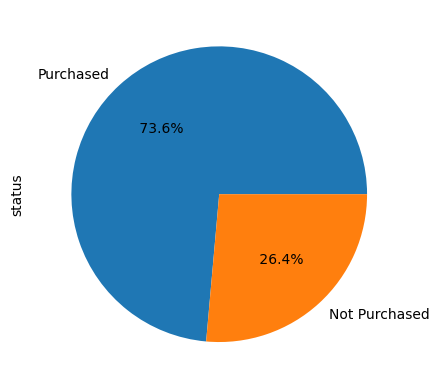

In [94]:
df['status'].value_counts().plot(kind = 'pie', autopct =' %1.1f%%')

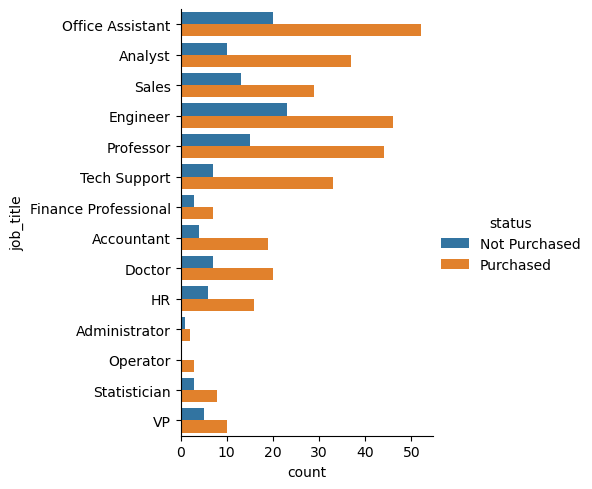

In [99]:
sns.catplot(data=df, y = 'job_title',hue="status",kind='count')

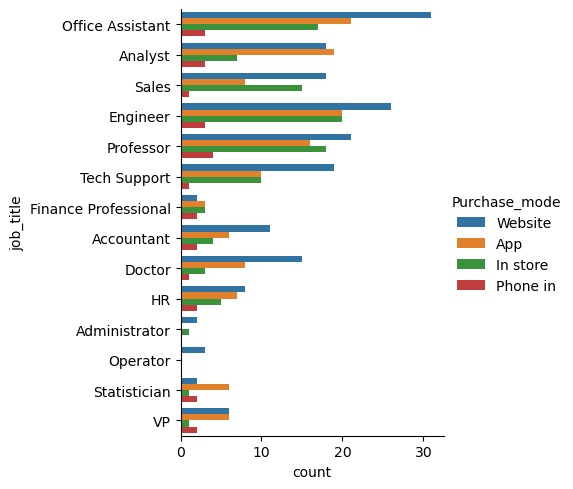

In [107]:
#lt.figure(figsize=(10,20))
sns.catplot(data=df, y= 'job_title',hue='Purchase_mode', kind='count')

In [109]:
df['Purchase_Amount'].mean()

TypeError: can only concatenate str (not "float") to str

In [115]:
df['Purchase_Amount'] = df['Purchase_Amount'].astype(int)

In [116]:
df['Purchase_Amount'].mean()

482.0541760722348